In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pyb
from numpy import random,dot,exp,array
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Part 1
ytb = pd.read_csv('youtubedetail.csv')
#X=array([ytb['high_comment'],ytb['category_id'],ytb['high_view']]).T
#x=array([ytb['high_comment'],ytb['high_view'],ytb['high_like'],ytb['category_id']]).T
#x=array([ytb['comment_count'],ytb['views'],ytb['likes'],ytb['category_id']]).T
x=array([ytb['views'],ytb['likes']]).T

#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(x)




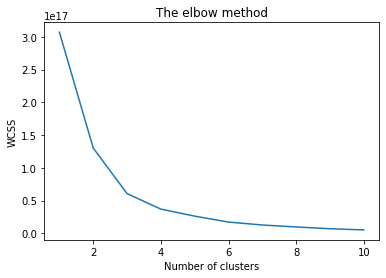

In [118]:
#Part 2: Find the optimum number of clusters for k-means
from sklearn.cluster import KMeans

wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()




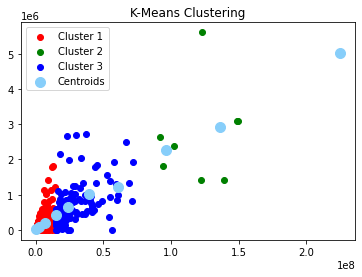

In [119]:
#2D plot
colors = 'rgbkcmy'

for i in np.unique(clusters):
    plt.scatter(x[clusters==i,0], x[clusters==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s=100, c='lightskyblue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
#plt.xlabel(dataset.columns[1])
#plt.ylabel(dataset.columns[2])
plt.show()


In [120]:
X=array([ytb['high_comment'],ytb['high_view']]).T
y=array([ytb['high_like']]).T

In [121]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.6)

In [122]:
transfer=StandardScaler()
x_train=transfer.fit_transform(X_train)
x_test=transfer.transform( X_test)


In [123]:
l, r, h = X_train[:, 0].min() - 1,X_train[:, 0].max() + 1, 0.005            
b, t, v = X_train[:, 1].min() - 1,X_train[:, 1].max() + 1, 0.005  

In [124]:
model = lm.LogisticRegression(solver='liblinear', C=50)          # C
model.fit(X_train, y_train)

D:\jupyter\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=50, solver='liblinear')

In [125]:
l, r, h = X_train[:, 0].min() - 1,X_train[:, 0].max() + 1, 0.005            
b, t, v = X_train[:, 1].min() - 1,X_train[:, 1].max() + 1, 0.005            
grid_x = np.meshgrid(np.arange(l, r, h), np.arange(b, t, v))                                              
flat_x = np.c_[grid_x[0].ravel(), grid_x[1].ravel()]             
flat_y = model.predict(flat_x)                                   
grid_y = flat_y.reshape(grid_x[0].shape)                         

<ipython-input-126-bdaff4d57852>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')


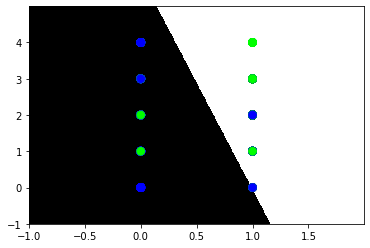

In [126]:
plt.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')       

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='brg', s=60)          


In [127]:
df = pd.read_csv('youtubedetail.csv').dropna()

In [128]:
df_0 = df[df['high_like'] == 0]
df_1 = df[df['high_like'] == 1]

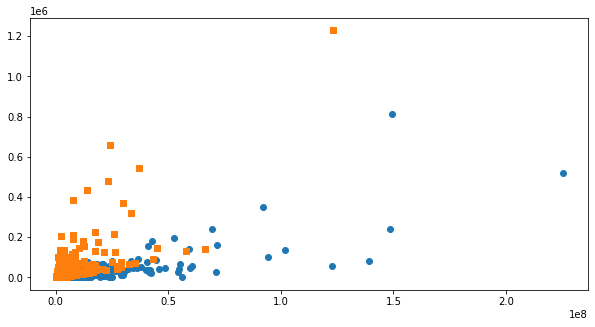

In [129]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_0['views'], df_0['comment_count']) # class = 0 circle points 
ax.scatter(df_1['views'], df_1['comment_count'], marker = 's') # class = 1 square points
x_min, x_max = ax.get_xlim()

In [130]:
logReg = LogisticRegression(solver = 'liblinear')

x = df[['views', 'comment_count']]
y = df['high_like']    # Classification : infected = 0 or 1


In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
x_train.head()

,views,comment_count
4729,269509,653
4362,37095,33
4115,1233722,9706
242,9178923,10150
1507,96756,119


In [132]:
transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)

In [133]:
logReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [134]:
model3 = LogisticRegression(solver = 'liblinear', random_state=0).fit(x_train, y_train)


In [135]:
model3.intercept_
print('the weight of Logistic Regression:',model3.coef_)
print('the intercept(w0) of Logistic Regression:',model3.intercept_)

the weight of Logistic Regression: [[-1.71783532  2.69135287]]
the intercept(w0) of Logistic Regression: [-0.39052764]


In [136]:
y_pred = logReg.predict(x_test)
print(y_test)
print(y_pred)

1411    0
5093    1
4823    0
1657    1
4934    1
       ..
5195    0
4482    1
1875    1
2617    0
5458    0
Name: high_like, Length: 1542, dtype: int64
[0 0 0 ... 0 0 0]


In [137]:
accuracy_score(y_test, y_pred)

0.6400778210116731

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

array([[ 81, 524],
       [ 31, 906]], dtype=int64)

In [139]:
logReg.predict(x_test)   # prediction value of x_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
from sklearn.metrics import classification_report
ret=classification_report(y_test,y_pred)
print(ret)

              precision    recall  f1-score   support

           0       0.63      0.97      0.77       937
           1       0.72      0.13      0.23       605

    accuracy                           0.64      1542
   macro avg       0.68      0.55      0.50      1542
weighted avg       0.67      0.64      0.55      1542



In [141]:
df = pd.read_csv('youtubedetail.csv')

In [142]:
df['category_id'] = df['category_id'].astype('category')
df['high_like'] = df['high_like'].astype('category') 
df['high_comment'] = df['high_comment'].astype('category')
df['high_view'] = df['high_view'].astype('category') 


In [143]:
data = df[[ 'comment_count','views', 'category_id']] # independent variables
 
target = df['high_like']  # dependent variable: y
data

,comment_count,views,category_id
0,82,258506,24
1,26,50168,1
2,106,86897,10
3,8,26830,10
4,10,15476,1
...,...,...,...
6163,2128,88560,25
6164,633,28378,25
6165,19656,881266,23
6166,10279,1063552,10


In [144]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [145]:
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) # train our model

DecisionTreeClassifier()

In [146]:
y_pred = dt.predict(x_test) # let the model predict the test data

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7185473411154345

In [148]:
print(y_pred) # what the model predict entertainment labels
print(y_test) # true labels


[1 0 0 ... 1 0 0]
3027    0
410     0
2484    0
5930    0
2827    1
       ..
6117    0
3065    0
2574    0
3792    1
677     0
Name: high_like, Length: 1542, dtype: category
Categories (2, int64): [0, 1]


In [149]:
from sklearn import tree
import graphviz
from graphviz import Source
import pydotplus
import sys
from six import StringIO


In [150]:
Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns,filled=True)) # display the tree, with no output file


In [151]:
dt.feature_importances_

array([0.43680452, 0.3838795 , 0.17931598])